In [3]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop\\letsupgrade_python'

In [2]:
os.chdir('C:\\Users\\HP\\Desktop\\letsupgrade_python')
os.getcwd()

'C:\\Users\\HP\\Desktop\\letsupgrade_python'

In [4]:
# Importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv("kyphosis.csv")
dataset.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
print(dataset.shape)

(81, 4)


In [35]:
# Encoding Concept
#  Kyphosis  81 non-null     object
print(dataset.Kyphosis[:5])
dataset['Kyphosis'] = pd.get_dummies(dataset.Kyphosis)['present']
print(dataset.Kyphosis[:5])

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object
0    0
1    0
2    1
3    0
4    0
Name: Kyphosis, dtype: uint8


In [36]:
dataset.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kyphosis  81 non-null     uint8
 1   Age       81 non-null     int64
 2   Number    81 non-null     int64
 3   Start     81 non-null     int64
dtypes: int64(3), uint8(1)
memory usage: 2.1 KB


In [38]:
#checking missing values
dataset.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [39]:
# see the distinct values in kyphosis column (dependent variable)
dataset.Kyphosis.value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [40]:
dataset.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [41]:
# split the data into dependent (y) & independent variable (x)
x = dataset.iloc[:,1:4]
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [42]:
y = dataset.iloc[:,0]
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: uint8

In [43]:
# split the data into training and test for model building
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 100)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 3)
(17, 3)
(64,)
(17,)


In [45]:
# Building Logistic Regression Model (Generalised Linear Model)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [46]:
# Predict the model with Test data set
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [47]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.00      0.00      0.00         3

    accuracy                           0.76        17
   macro avg       0.41      0.46      0.43        17
weighted avg       0.67      0.76      0.71        17



In [52]:
confusion_matrix(y_test,y_pred)

array([[13,  1],
       [ 3,  0]], dtype=int64)

In [53]:
(13+0)/(13+1+3+0)

0.7647058823529411

# 76.4% Accuracy

# ROC-AUC CURVE

In [54]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc_score = roc_auc_score(y_test,y_pred)
logistic_roc_auc_score

0.4642857142857143

# as per ROC-AUC Accuracy = 46.4%

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [56]:
model.predict_proba(x_test)[:,1][:5]

array([0.05209138, 0.13529956, 0.05598618, 0.00771197, 0.64478521])

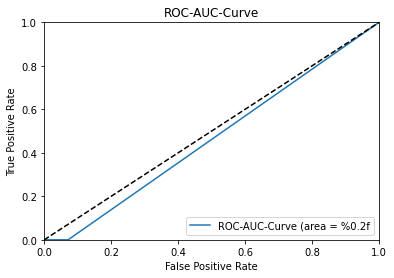

Logistic AUC = 0.46


In [57]:
plt.figure()
plt.plot(fpr,tpr,label = "ROC-AUC-Curve (area = %0.2f")
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC-Curve')
plt.legend(loc="lower right")
plt.show()
print("Logistic AUC = %2.2f" % logistic_roc_auc_score )